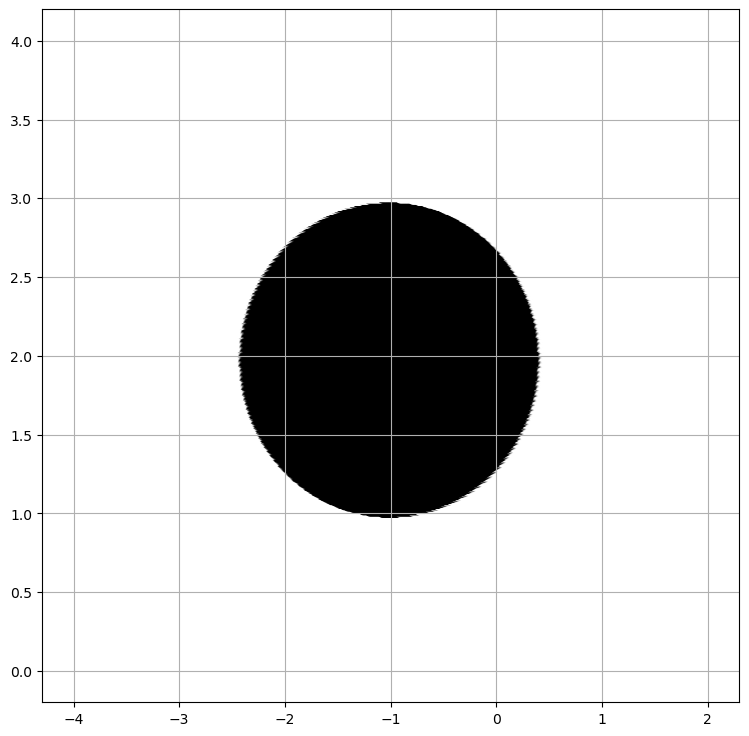

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def region(a, b):
    return a**2 + 2*(b**2) <= -2*a + 8*b - 7
xnum = np.linspace(-4, 2, 500)
ynum = np.linspace(0, 4, 500)
X, Y = np.meshgrid(xnum, ynum)
def montecarlo2(region, x1, y1, x2, y2, N):
    AR = (y1-x1)*(y2-x2)
    x = np.random.uniform(x1, y1, N)
    y = np.random.uniform(x2, y2, N)
    bi = region(a, b)
    AD_approx = AR*np.mean(bi)
    return AD_approx
plt.figure(figsize=(9, 9))
plt.scatter(X, Y, c=~region(X,Y), cmap='bone') 
plt.grid()
plt.show()

In [18]:
from scipy import integrate

# Función que define la región
def region(a, b):
    return a**2 + 2*(b**2) <= -2*a + 8*b - 7

# Definir los límites de integración como una lista de tuplas
limits = [(x1, y1), (x2, y2)]

# Calcular el área exacta mediante integración numérica
ar_ex, _ = integrate.nquad(region, limits, opts={'limit': 100})

print("Área Exacta:", ar_ex)

Área Exacta: 4.442851458443582


C:\Users\Asus\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [16]:
a1, b1, a2, b2 = -3, 1, 0, 3
N = np.logspace(1, 6, 6).astype(int)
tabla = pd.DataFrame(index=N, columns=['Aproximación', 'Error Absoluto', 'Error Relativo'])
for n in N:
    ar_ap = montecarlo2(region, a1, b1, a2, b2, n)
    er_ab = abs(ar_ex - ar_ap)
    er_re = (er_ab / ar_ex) * 100
    tabla.loc[n, 'Aproximación'] = ar_ap
    tabla.loc[n, 'Error Absoluto'] = er_ab
    tabla.loc[n, 'Error Relativo'] = er_re

tabla


,Aproximación,Error Absoluto,Error Relativo
10,2.4,2.042851,45.980638
100,4.44,0.002851,0.064181
1000,4.272,0.170851,3.845536
10000,4.4496,0.006749,0.151897
100000,4.45152,0.008669,0.195112
1000000,4.447644,0.004793,0.107871
